# <center>UPGMA algorithm with varying metrics</center>
# <center>UPGMA algoritam sa proizvoljnim izborom metrike</center>


Loading libraries:
   1. Numpy and Pandas necessary for efficient array and matrix manipulations
   2. Math for the math part
   3. Ast for parsing strings into lists of characters
   4. Scipy and Matplotlib for generating dendrograms

Učitavanje odgovarajućih biblioteka:
   1. Numpy i Pandas su potrebne zarad lakše manipulacije nizova i učitanih matrica rastojanja
   2. Math za lakše računanje složenih matematičkih operacija
   3. Ast za potrebe parsiranja stringova u liste
   4. Scipy i Matplotlib za iscrtavanje dendrograma

In [1]:
import numpy as np
import pandas as pd
import math
import ast
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use ('dark_background')


Used UPGMA implementation is the same one as shown during course. Cluster is represented as Python class. Different metrics result in different clusters.
Let's say that the number of elements in the first cluster is *n* and in the second cluster is *m*, and that there is a distance matrix named **distance** that defines similarity between each row and column.
The metrics used are:
   1. Arithmetic mean (deafult choice of UPGMA):
\begin{equation*} \frac{1}{n*m}\left( \sum_{i=1}^n \sum_{j=1}^m distance[i, j] \right) \end{equation*}
   2. Minkowski metric:
\begin{equation*} \left(\sum_{i=1}^n \sum_{j=1}^m | distance[i, j] |^p\right)^{1/p} \end{equation*}

Important:
    1. For p=1 we have Manhattan distance.
    2. For p=2 we have Euclidean distance.
    3. When p->+inf we have Chebyshev distance:
\begin{equation*} \lim_{p\to\infty}{(\sum_{i=1}^n \sum_{j=1}^m |distance [i,j]|^p)^{1/p}} = \max_{i=1, j=1}^{n,m} (|distance [i,j]|) \end{equation*}


Program kao osnovu koristi UPGMA implementaciju obrađenu na vežbama uz odgovarajuće modifikacije. Klaster (kao i na vežbama) predstavljamo u obliku klase.
Algoritam počiva na implementiranju UPGMA algoritma uz pomoć različitih metrika (rastojanja) koje samim tim menjaju i oblike klastera.
Neka su dva klastera kardinalnosti n i m respektivno i neka postoji matrica **rastojanja** koja definiše rastojanje (sličnost) između svake vrste i kolone (matrica je kvadratna a vrste i kolone odgovaraju organizmima). Metrike koje se koriste su:
    1. Aritmetička sredina (metrika koja se klasično koristi):
\begin{equation*} \frac{1}{n*m}\left( \sum_{i=1}^n \sum_{j=1}^m rastojanje[i, j] \right) \end{equation*}
    2. Minkovski metrika:
\begin{equation*} \left(\sum_{i=1}^n \sum_{j=1}^m | rastojanje[i, j] |^p\right)^{1/p} \end{equation*}

Primetimo sledeće:
    1. Za p=1 dobijamo Menhetn rastojanje.
    2. Za p=2 dobijamo euklidsko rastojanje.
    3. Kada p->+inf dobijamo Čebišovljevo rastojanje, tj. rastojanje oblika:
\begin{equation*} \lim_{p\to\infty}{(\sum_{i=1}^n \sum_{j=1}^m |rastojanje [i,j]|^p)^{1/p}} = \max_{i=1, j=1}^{n,m} (|rastojanje [i,j]|) \end{equation*}


In [2]:
class Klaster:
    def __init__ (self, elementi, starost):
        self.elementi = elementi
        self.starost = starost
        self.levo = None
        self.desno = None
    
    def __str__ (self):
        return ("%s : %d" % (self.elementi, self.starost))
    
    def dodaj_levo (self, l):
        self.levo = l
    
    def dodaj_desno (self, r):
        self.desno = r

def rastojanje_klasicno (mat_rast, klaster_1, klaster_2):

    d = 0
    n1 = len(klaster_1.elementi)
    n2 = len(klaster_2.elementi)

    for i in klaster_1.elementi:
        for j in klaster_2.elementi:
            d += mat_rast[i][j]
    
    return d/(n1*n2)

# Za p = 1:  Menhetn rastojanje
# Za p = 2:  euklidsko rastojanje
def rastojanje_minkovski (mat_rast, klaster_1, klaster_2, p):

    d = 0
    n1 = len(klaster_1.elementi)
    n2 = len(klaster_2.elementi)

    # Ako smo van okvira, radimo klasicno euklidsko rastojanje
    # Stavljamo radi sigurnosti
    if (p < -100 or p > 100):
        p = 2
    
    for i in klaster_1.elementi:
        for j in klaster_2.elementi:
            d += math.pow (abs(mat_rast[i][j]), p)
    
    return math.pow (d, 1/p)

# Slucaj kada p -> +inf
def rastojanje_cebisev (mat_rast, klaster_1, klaster_2):

    d = []
    n1 = len(klaster_1.elementi)
    n2 = len(klaster_2.elementi)
    
    for i in klaster_1.elementi:
        for j in klaster_2.elementi:
            d.append (abs(mat_rast[i][j]))
    
    d = np.array (d)

    return np.max (d)


Function that finds clusters with minimal distance in given metrics and returns the indexes of those clusters and their distance

Implementacija funkcije koja nalazi klastere na najmanjem rastojanju u odgovarajućoj metrici i vraća njihove indekse i odgovarajuće rastojanje.

In [3]:
def min_rastojanje (klasteri, mat_rast, br_klastera, p):

    minimum = float('inf')
    min_i = -1
    min_j = -1

    for i in range (br_klastera):
        for j in range (i+1, br_klastera):
            if p >= -100 or p <= 100:
                tmp = rastojanje_minkovski (mat_rast, klasteri[i], klasteri[j], p)
            
            elif p == 101:
                tmp = rastojanje_cebisev (mat_rast, klasteri[i], klasteri[j])
                
            elif p == 102:
                tmp = rastojanje_klasicno (mat_rast, klasteri[i], klasteri[j])
            
            else:
                tmp = 0
                print ('GRESKA U FUNKCIJI MIN_RASTOJANJE')
            
            if tmp < minimum:
                minimum = tmp
                min_i = i
                min_j = j
            
    return (min_i, min_j, minimum)


Implementing UPGMA algorithm with slight modification. In order to use scipy function for dendrogram drawing, cluster classes should be saved in more adequate structure. Therefore, map **mapa_klastera** is used with cluster elements as keys *[a, b, c, ...]*.


Implementacija UPGMA algoritma uz malu modifikaciju. Za potrebe crtanja dendrograma pomoću ugrađene funkcije iz scipy biblioteke, potrebno je rezultate koji se dobijaju u obliku klasa sačuvati u pogodniji oblik.
U te svrhe se kreira **mapa_klastera** čiji ključevi predstavljaju niske oblika *[a, b, c...]* gde su elementi a, b i c zapravo elementi klastera kojeg ovaj ključ definiše a vrednosti koje odgovaraju ključu su oblika *(redni broj klastera, redni broj levog sina, redni broj desnog sina, rastojanje klastera od sinova)* pri čemu je rastojanje klastera od sinova definisano kao polovina rastojanja između sinova.
Inicijalno, ova mapa sadrži klastere koji su jednočlani. Zatim se oni grupišu u veće klastere na osnovu dole navedenog algoritma.

In [4]:
def UPGMA(mat_rast, n, p):

    # Kreiramo klastere sa po jednim elementom, redni broj oznacava organizam u matrici
    klasteri = [Klaster([i], 0) for i in range(n)]
    br_klastera = len(mat_rast)

    # Koristimo da bi inicijalizovali ime novog klastera
    k = n
    mapa_klastera = {}
    # Svaki klaster sadrzi: redni broj, levog sina, desnog sina, rastojanje klastera od sinova
    for i in range (n):
        mapa_klastera[str([i])] = (i, i, i, 0)
    
    
    while br_klastera > 1:
        (i, j, rast) = min_rastojanje (klasteri, mat_rast, br_klastera, p)

        novi_klaster = Klaster (klasteri[i].elementi + klasteri[j].elementi, rast/2)
        novi_klaster.dodaj_levo (klasteri[i])
        novi_klaster.dodaj_desno (klasteri[j])
        
        novi_klasteri = []

        for c in range(br_klastera):
            if c != i and c != j:
                novi_klasteri.append (klasteri[c])
        
        novi_klasteri.append (novi_klaster)
        klasteri = novi_klasteri[:]
        br_klastera -= 1
        
        # Kreiranje novog klastera je objedinjavanje dva sa najmanjim rastojanjem
        mapa_klastera[str(novi_klaster.elementi)] = (k, mapa_klastera[str(novi_klaster.levo.elementi)][0], mapa_klastera[str(novi_klaster.desno.elementi)][0], rast/2)
        # Uvecavamo broj klastera
        k += 1
        
        
    return mapa_klastera


Helper function which creates Linkage Matrix used for dendrogram drawing. More about usage on **Link 1** and **Link 2**.


Linkage matrica (tj. matrica povezanosti) predstavlja reprezentaciju rezultata algoritma klasterovanja i koristi se kao ulaz bibliotečke funkcije *dendrogram* koja služi za iscrtavanje rezultata. Promenljiva **mapa_klastera** je kreirana upravo sa ciljem da se premosti različitost implementacija i omogući jednostavno kreiranje ove matrice. O samoj matrici se može više pročitati na linkovima:

[Link 1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) (deo koji opisuje povratnu vrednost funkcije)

[Link 2](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/) (deo na početku stranice)
    

In [5]:
def napravi_linkage_matricu (mapa_klastera, n):
    
    Z = np.empty ((n-1, 4))
    k = 0
    
    # Kreiranje Linkage matrice
    for i in mapa_klastera:
        
        # Pretvaranje stringa u listu
        j = len(ast.literal_eval(i))
        
        # Razmatranje samo slucajeva gde klaster nije jednoclan
        if (j >= 2):
            Z[k] = np.array ([mapa_klastera[i][1], mapa_klastera[i][2], mapa_klastera[i][3]*2, j])
            k += 1
    
    return Z
    

Funkcija za crtanje rezultujućih dendrograma. 

In [6]:
def iscrtaj_dendrogram (mape_klastera, n, imena):
    
    m = len (mape_klastera)
    
    fig, axs = plt.subplots (nrows = m//2, ncols = 2, figsize = (50, 100))
    plt.subplots_adjust(wspace=None, hspace=0.5)
    plt.rcParams.update({'font.size': 20})
    
    fig.suptitle ('Dendrogrami vrsta u zavisnosti od izabrane metrike')
    
    i = 0
    for ax_i in axs:
        for ax_j in ax_i:
            
            if (mape_klastera[i][1] != 101 and mape_klastera[i][1] != 102):
                ax_j.set_title ('Dendrogram za p = %d' % mape_klastera[i][1])
            elif (mape_klastera[i][1] == 101):
                ax_j.set_title ('Dendrogram za Cebisev metriku (p = +inf)')
            else:
                ax_j.set_title ('Dendrogram za klasicnu UPGMA metriku')
            
            ax_j.set_xlabel('Rastojanje')
            ax_j.set_ylabel('Organizmi')

            Z = napravi_linkage_matricu (mape_klastera[i][0], n)

            dendrogram (
                Z,
                leaf_rotation = 0,
                leaf_font_size = 18,
                orientation = 'left',
                labels = imena,
                ax = ax_j
            )

            i += 1
    
    plt.savefig (fname = 'dendrogrami.png', format = 'png')
    plt.show()


Matrix used in this project is below.

Matrica rastojanja korišćena u ovom primeru je dobijena na osnovu celih sekvenci β-globin (hemoglobin beta) gena preuzetih sa NCBI (http://www.ncbi.nlm.nih.gov). Matrica je kreirana na osnovu referentnog rada: [link](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-13-174)


In [7]:
podaci = pd.read_csv ('../Literatura/Matrica_rastojanja.csv', index_col = 0)
podaci

,Human,Goat,Opossum,Gallus,Lemur,Mouse,Rat,Gorilla,Bovine,Chimpanzee
Human,0.00,22.95,37.65,111.47,14.02,35.21,20.68,3.42,25.07,3.54
Goat,22.95,0.00,41.22,65.70,18.80,35.05,33.93,32.36,6.04,33.05
Opossum,37.65,41.22,0.00,42.54,33.29,64.03,51.64,46.35,40.41,49.73
Gallus,111.47,65.70,42.54,0.00,90.93,80.07,95.26,121.09,61.69,122.65
Lemur,14.02,18.80,33.29,90.93,0.00,21.39,18.50,17.19,18.12,18.74
Mouse,35.21,35.05,64.03,80.07,21.39,0.00,16.04,33.64,27.60,37.59
Rat,20.68,33.93,51.64,95.26,18.50,16.04,0.00,17.69,30.53,20.58
Gorilla,3.42,32.36,46.35,121.09,17.19,33.64,17.69,0.00,33.66,0.80
Bovine,25.07,6.04,40.41,61.69,18.12,27.60,30.53,33.66,0.00,35.46
Chimpanzee,3.54,33.05,49.73,122.65,18.74,37.59,20.58,0.80,35.46,0.00


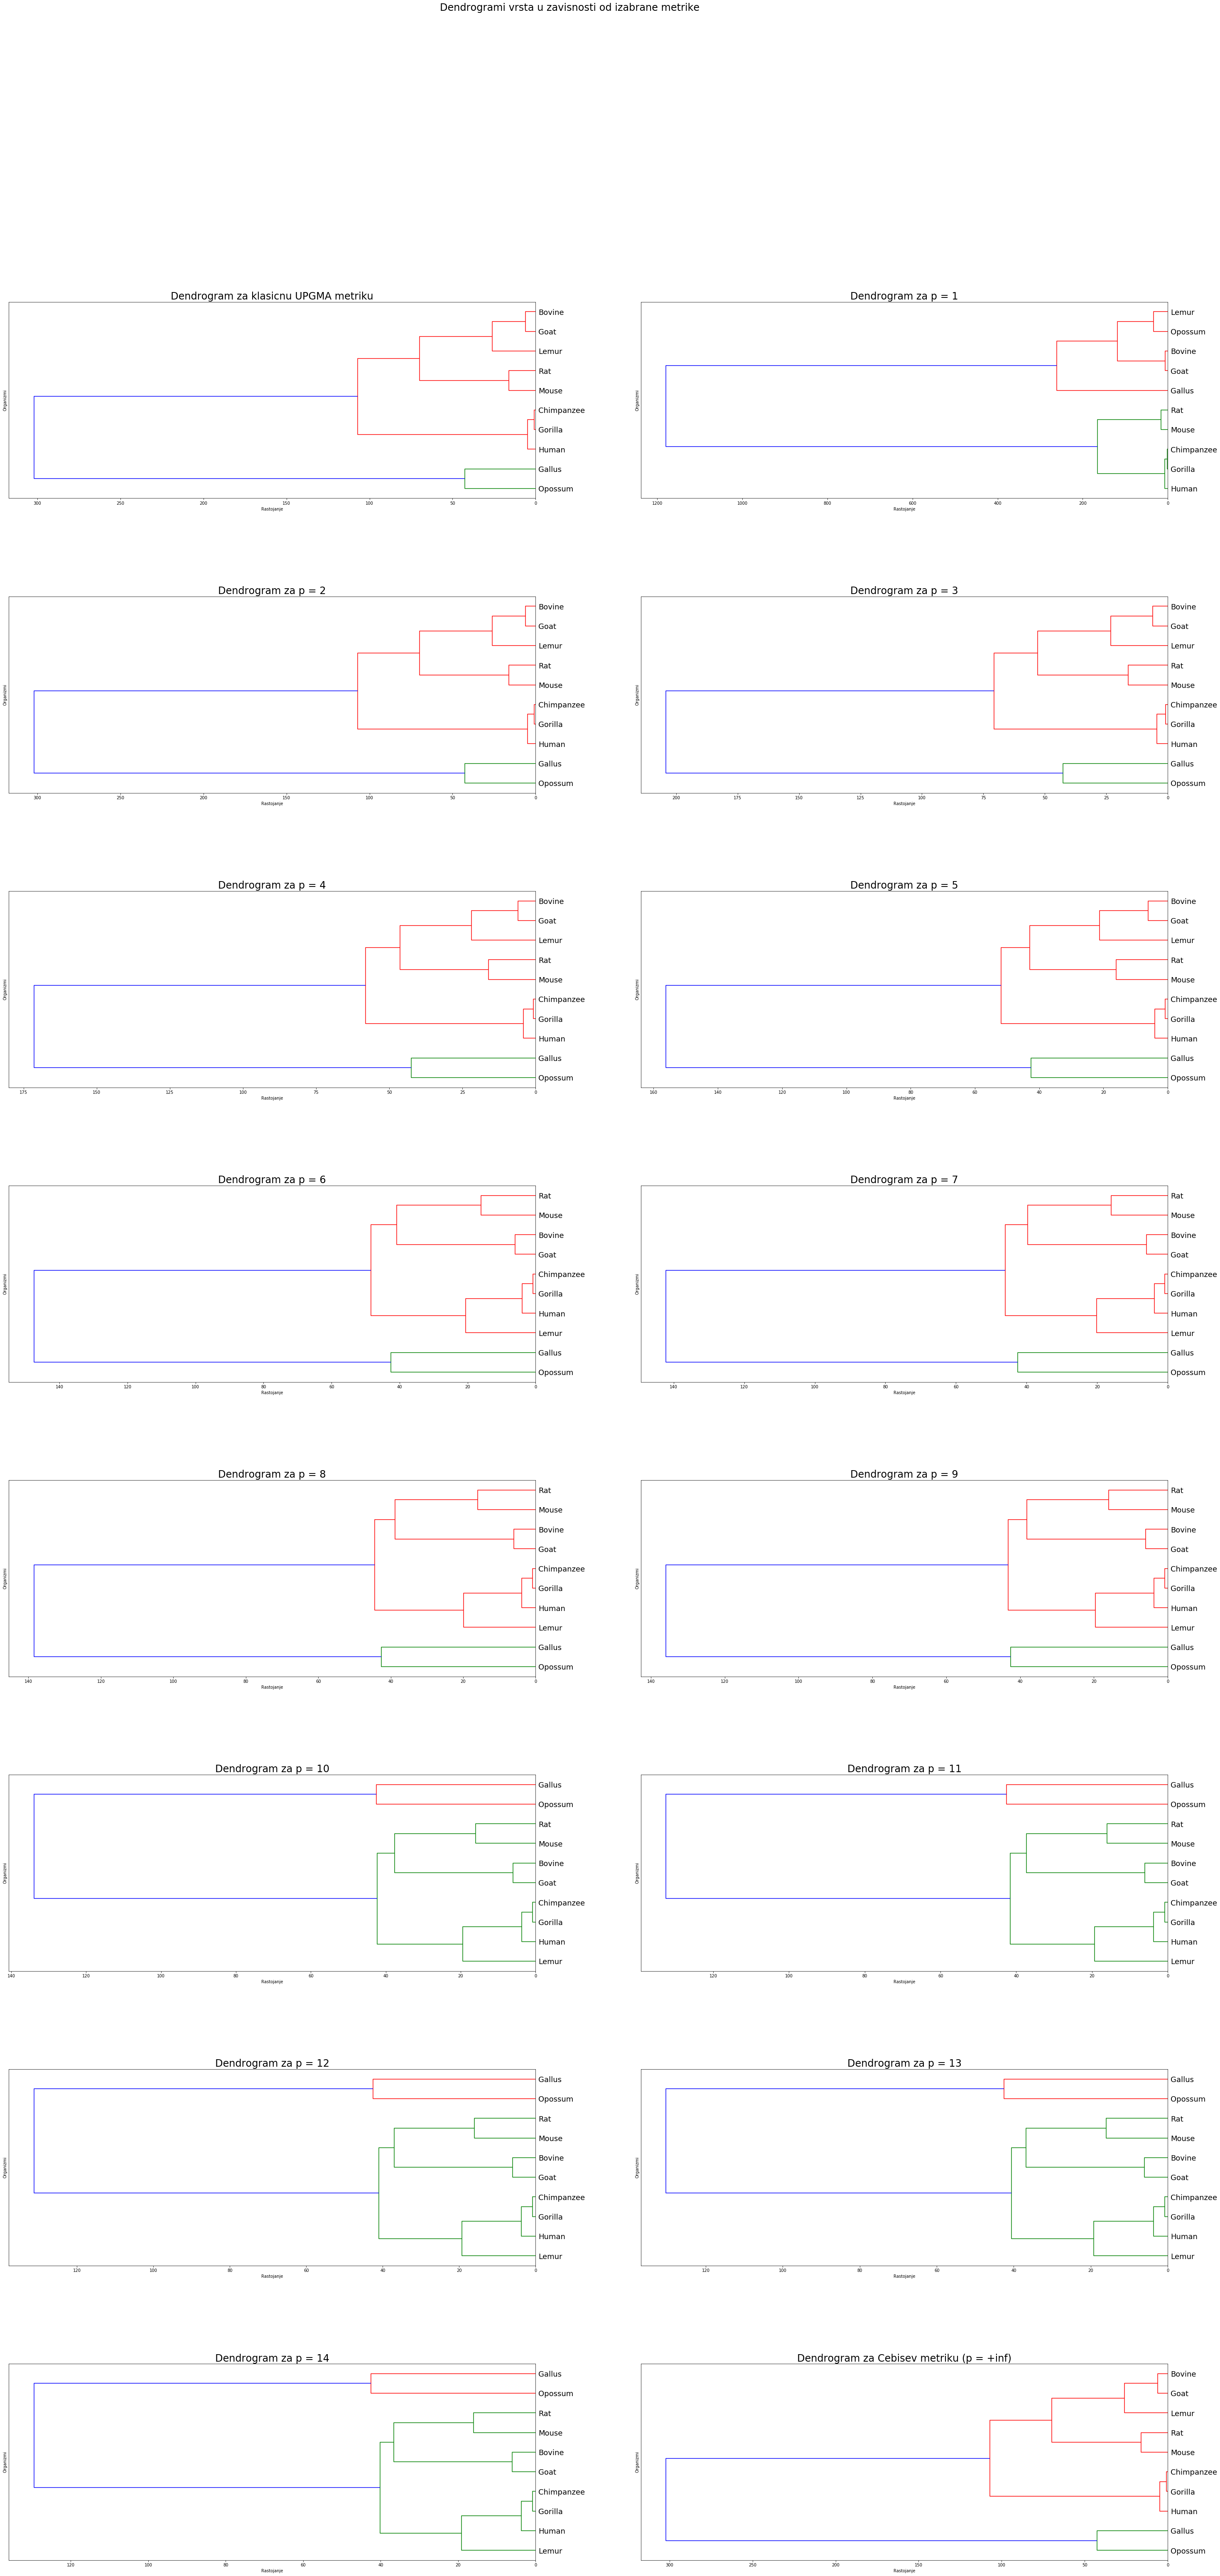

In [8]:
imena = podaci.columns
mat = podaci.values

n = len(mat)

rezultati = []

# Prvo racunamo za klasicnu UPGMA metriku, ovo posmatramo kao referentni rezultat
rezultati.append ((UPGMA(mat, n, 102), 102))

# Racunanje za proizvoljne vrednosti p-a
# Bitno je da je broj brojeva p paran, zbog iscrtavanja !!!
for p in range (1, 15):
    rezultati.append ((UPGMA (mat, n, p), p))

# Racunanje za Cebisev metriku
rezultati.append ((UPGMA(mat, n, 101), 101))


iscrtaj_dendrogram (rezultati, n, imena)



### Zaključak

Primetimo da su glavne strukture u većini metrika jako očuvane a da se promene mogu videti na nižim slojevima klasterovanja (kod samih listova). Lemur je jedan od organizama koji dosta "šeta" te treba dublje razmotriti zašto se to dešava i koji je uticaj metrika na takav fenomen. U svakom slučaju, jasno je uočljiv značaj izbora funkcije rastojanja između samih organizama jer ona može dosta da utiče na polazne faze klasterovanja a da se samim tim prenese taj uticaj i na kasnije faze (domino efekat), što nekad može da dovede do dobrih, a nekad do loših rezultata.
Za dalja ispitivanja je pogodnije uzeti veću matricu rastojanja (sličnosti) i pokrenuti nad njom algoritam. Za matrice organizama iz istih familija se očekuju različiti dendrogrami jer će i sličnosti među organizama biti veće a samim tim će metrike imati veći uticaj. Ovo naravno treba proveriti.

